In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import yfinance as yf
tickers = ["AAPL", "MSFT"]
raw = yf.download( tickers, start="2018-01-01", end="2024-01-01")
raw.head(7)




[                       0%                       ]Failed to get ticker 'AAPL' reason: Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  2 of 2 completed


Price           Close                  High                   Low             \
Ticker           AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2018-01-02  40.341877  79.050354  40.351247  79.381456  39.639302  78.636481   
2018-01-03  40.334873  79.418266  40.878200  79.565426  40.271644  79.068773   
2018-01-04  40.522209  80.117264  40.625254  80.623115  40.299728  79.620611   
2018-01-05  40.983582  81.110580  41.070231  81.312921  40.526908  80.411587   
2018-01-08  40.831352  81.193329  41.126433  81.469249  40.732989  80.567916   
2018-01-09  40.826664  81.138153  40.997623  81.607215  40.611208  80.807051   
2018-01-10  40.817287  80.770294  40.819632  81.110595  40.515182  80.393210   

Price            Open                Volume            
Ticker           AAPL       MSFT       AAPL      MSFT  
Date                                                   
2018-01-02  39.850076  79.215905  102223600  22483800  
2018-01-03  40.405131  79.151545  118071600  26061400  
2018-01-04  40.407454  79.639003   89738400  21912000  
2018-01-05  40.618243  80.623127   94640000  23407100  
2018-01-08  40.831352  81.119749   82271200  22113000  
2018-01-09  40.878186  81.533635   86336000  19484300  
2018-01-10  40.552653  80.807084   95839600  18652200

In [6]:
close_price= raw["Close"]
close_price.index= pd.to_datetime(close_price.index)
close_price= close_price.sort_index()
close_price= close_price.dropna(how= "all")
print(close_price.head())
print("\nShape:", close_price.shape)

Ticker           AAPL       MSFT
Date                            
2018-01-02  40.341877  79.050354
2018-01-03  40.334873  79.418266
2018-01-04  40.522209  80.117264
2018-01-05  40.983582  81.110580
2018-01-08  40.831352  81.193329

Shape: (1509, 2)


In [7]:
print("Missing values per col:")
print(close_price.isna().sum())
print("\nTotal of missing values:")
print(close_price.isna().sum().sum())


Missing values per col:
Ticker
AAPL    0
MSFT    0
dtype: int64

Total of missing values:
0


<class 'pandas.core.frame.DataFrame'>
True
False
<bound method NDFrame.describe of Ticker            AAPL        MSFT
Date                              
2018-01-02   40.341877   79.050354
2018-01-03   40.334873   79.418266
2018-01-04   40.522209   80.117264
2018-01-05   40.983582   81.110580
2018-01-08   40.831352   81.193329
...                ...         ...
2023-12-22  191.788773  369.077148
2023-12-26  191.243912  369.155945
2023-12-27  191.342972  368.574615
2023-12-28  191.768936  369.766815
2023-12-29  190.728775  370.515686

[1509 rows x 2 columns]>


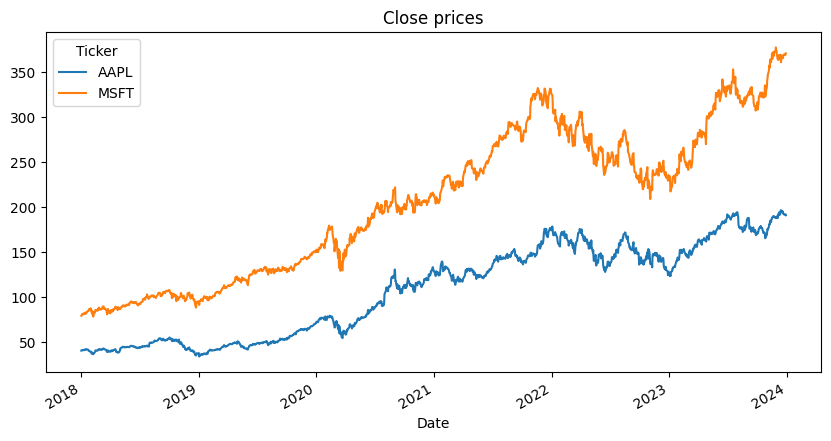

In [8]:
print(type(close_price))
print(close_price.index.is_monotonic_increasing)
print(close_price.index.has_duplicates)
print(close_price.describe)
close_price.plot(figsize=(10,5), title="Close prices")
plt.show()

In [9]:
simple_return= close_price.pct_change()
simple_return=simple_return.dropna()
print(simple_return.head())
print("\nShape:", simple_return.shape)

Ticker          AAPL      MSFT
Date                          
2018-01-03 -0.000174  0.004654
2018-01-04  0.004645  0.008801
2018-01-05  0.011386  0.012398
2018-01-08 -0.003714  0.001020
2018-01-09 -0.000115 -0.000680

Shape: (1508, 2)


In [10]:
log_return= np.log(close_price/close_price.shift(1))
log_return= log_return.dropna()
print(log_return.head())
print("\nShape:", log_return.shape)

Ticker          AAPL      MSFT
Date                          
2018-01-03 -0.000174  0.004643
2018-01-04  0.004634  0.008763
2018-01-05  0.011321  0.012322
2018-01-08 -0.003721  0.001020
2018-01-09 -0.000115 -0.000680

Shape: (1508, 2)


In [11]:
print(simple_return.index.equals(log_return.index))
print(simple_return.columns.equals(log_return.columns))

print(simple_return.describe())
print(log_return.describe())


True
True
Ticker         AAPL         MSFT
count   1508.000000  1508.000000
mean       0.001230     0.001205
std        0.019955     0.018976
min       -0.128647    -0.147390
25%       -0.008261    -0.008062
50%        0.001176     0.001317
75%        0.011896     0.010964
max        0.119808     0.142169
Ticker         AAPL         MSFT
count   1508.000000  1508.000000
mean       0.001030     0.001024
std        0.019965     0.018980
min       -0.137708    -0.159454
25%       -0.008296    -0.008095
50%        0.001175     0.001316
75%        0.011825     0.010904
max        0.113157     0.132929


In [12]:
print("Prices shape:", close_price.shape)
print("Simple returns shape:", simple_return.shape)
print("Log returns shape:", log_return.shape)
print("\nAny NaNs left?")
print(simple_return.isna().any().any(), log_return.isna().any().any())

Prices shape: (1509, 2)
Simple returns shape: (1508, 2)
Log returns shape: (1508, 2)

Any NaNs left?
False False


<function matplotlib.pyplot.show(close=None, block=None)>

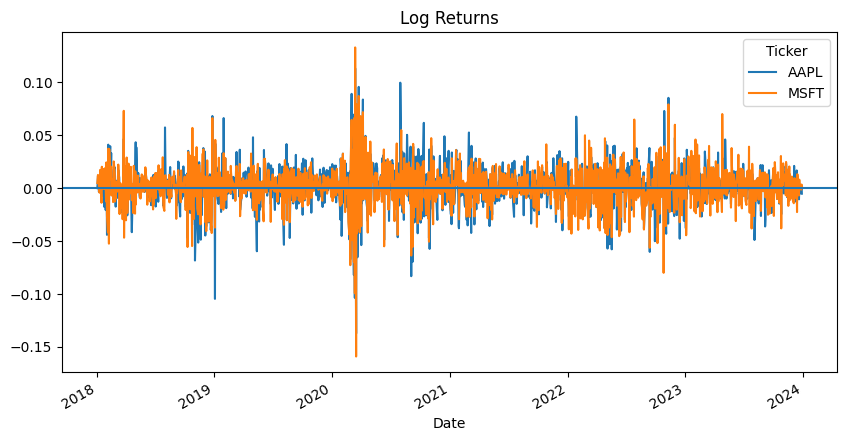

In [13]:
log_return.plot(figsize=(10,5), title="Log Returns")
plt.axhline(0)
plt.show

<bound method NDFrame.head of Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2023-12-22    0.612474
2023-12-26    0.612720
2023-12-27    0.602213
2023-12-28    0.595582
2023-12-29    0.591141
Length: 1508, dtype: float64>


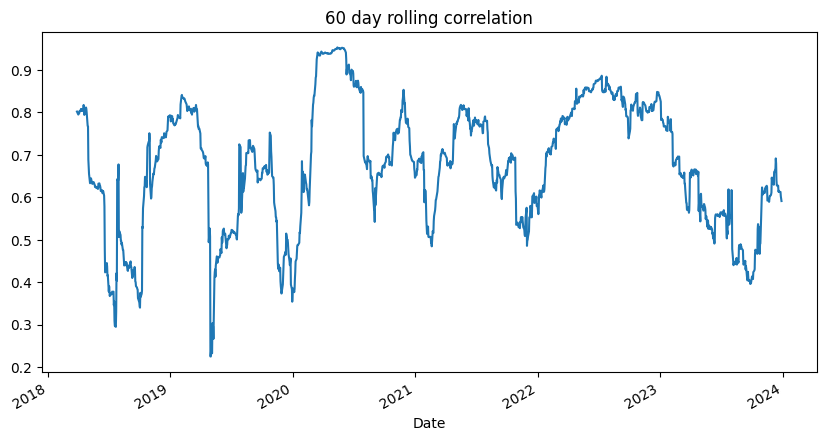

In [14]:
window = 60

rolling_corr= (log_return["AAPL"]
               .rolling(window=window)
               .corr(log_return["MSFT"]))

print(rolling_corr.head)

rolling_corr.plot(figsize=(10,5), title= "60 day rolling correlation")
plt.show()

Date
2018-01-02   -0.672695
2018-01-03   -0.677512
2018-01-04   -0.681641
2018-01-05   -0.682642
2018-01-08   -0.687383
dtype: float64

Stats:
count    1509.000000
mean       -0.690945
std         0.141015
min        -1.024505
25%        -0.789805
50%        -0.667106
75%        -0.581012
max        -0.404829
dtype: float64


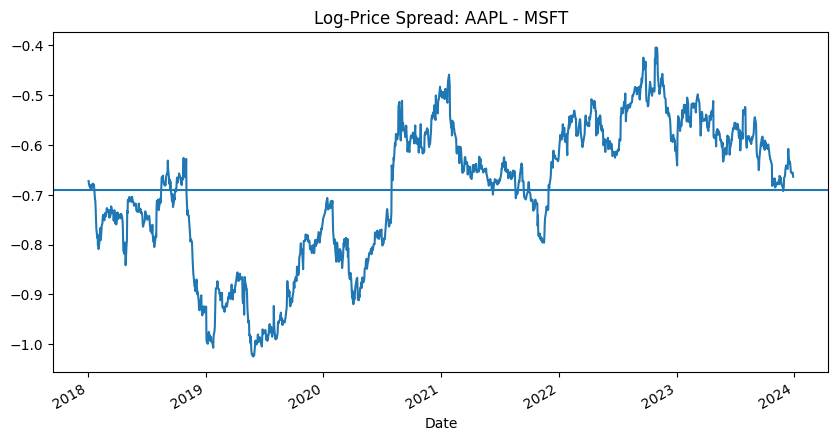

In [15]:
log_price= np.log(close_price)
spread= log_price["AAPL"]- log_price["MSFT"]
print(spread.head())
print("\nStats:")
print(spread.describe())
spread.plot(figsize=(10,5), title="Log-Price Spread: AAPL - MSFT")
plt.axhline(spread.mean())
plt.show()

In [16]:
import statsmodels.api as sm

x = log_price["MSFT"]
y = log_price["AAPL"]

x_const= sm.add_constant(x)

model= sm.OLS(y, x_const).fit()

hedge_ratio= model.params["MSFT"]
print("Hedge ratio:", hedge_ratio)
print(model.summary())

Hedge ratio: 1.2028130280121605
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 3.810e+04
Date:                Thu, 01 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:17:35   Log-Likelihood:                 1223.9
No. Observations:                1509   AIC:                            -2444.
Df Residuals:                    1507   BIC:                            -2433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.752

Date
2018-01-02   -1.559005
2018-01-03   -1.564764
2018-01-04   -1.570670
2018-01-05   -1.574170
2018-01-08   -1.579118
dtype: float64

Beta-hedged spread stats:
count    1509.000000
mean       -1.752528
std         0.107563
min        -1.993747
25%        -1.835467
50%        -1.747582
75%        -1.660776
max        -1.495958
dtype: float64


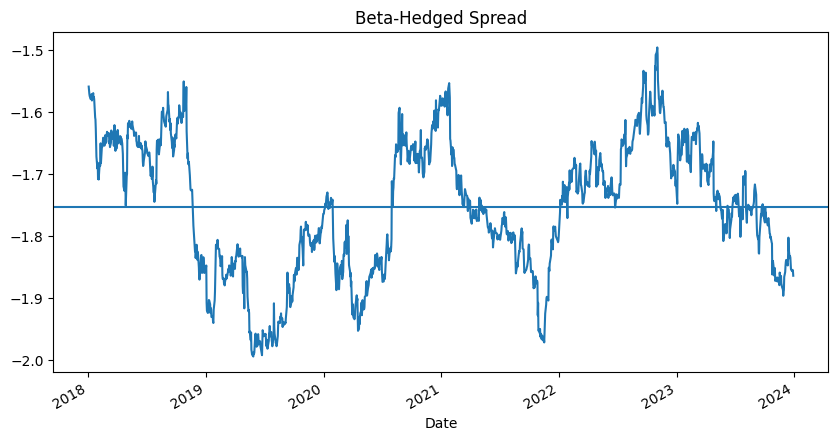

In [17]:
headge_spread= log_price["AAPL"]- hedge_ratio*log_price["MSFT"]
print(headge_spread.head())
print("\nBeta-hedged spread stats:")
print(headge_spread.describe())

headge_spread.plot(figsize=(10, 5), title="Beta-Hedged Spread")
plt.axhline(headge_spread.mean())
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

ADF_test= adfuller(headge_spread)
print("Stats:", ADF_test[0])
print("P-value:", ADF_test[1])
print("Critical value:")
for k,v in ADF_test[4].items():
    print(f"{k}: {v}")

Stats: -2.6085074195128612
P-value: 0.09125167394544315
Critical value:
1%: -3.434725783926551
5%: -2.863472629385615
10%: -2.567798908763865


In [22]:

window = 60
rolling_beta = []

for i in range(window, len(log_price)):
    y = log_price["AAPL"].iloc[i-window:i]
    x = log_price["MSFT"].iloc[i-window:i]

    x_const = sm.add_constant(x)

    model = sm.OLS(y, x_const).fit()
    rolling_beta.append(model.params["MSFT"])

rolling_beta = pd.Series(
    rolling_beta,
    index=log_price.index[window:]
)

rolling_beta.head()

Date
2018-03-29    0.585029
2018-04-02    0.626915
2018-04-03    0.675073
2018-04-04    0.718173
2018-04-05    0.754035
dtype: float64